# Turnover após 1 ano

## O conjunto de dados e objetivo

Esse conjunto de dados apresenta dados de funcionários de diferentes empresas e indica se o funcionário deixou a empresa após 1 ano ou não (turnover após 1 ano). O conjunto apresenta 11 colunas, sendo uma contendo a resposta sobre o turnover e as outras 10 apresentam diversas características sobre os funcionários e as empresas onde trabalham. 

Temos as seguintes variáveis:

* Categóricas
    * Sexo
    * Raça/Cor
    * Escolaridade
    * UF
    * Deficiência
    * Porte da empresa
    * Setor da empresa
    * Turnover

* Numéricas
    * Idade
    * Horas de trabalho
    * Salário
    
O objetivo dessa análise é empregar modelos de classificação e investigar a capacidade desses de prever o turnover.

## Carregando os dados

In [1]:
# importando as bibliotecas básicas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando os dados
df = pd.read_csv('treino.csv', sep = ';', decimal = ',')

In [3]:
df.head()

,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,24,AMARELA-BRANCA,MEDIO COMPLETO,RN,NAO,DE 10 A 19,Serviços,44,1750.65,SIM
1,MASCULINO,24,SEM INFO,MEDIO COMPLETO,BA,NAO,ATE 4,Comércio,44,1002.30,NAO
2,FEMININO,25,PRETA-PARDA,MEDIO COMPLETO,SE,NAO,DE 20 A 49,Comércio,44,1370.14,NAO
3,MASCULINO,54,PRETA-PARDA,MEDIO COMPLETO,PE,NAO,DE 20 A 49,Comércio,44,1854.68,SIM
4,MASCULINO,40,PRETA-PARDA,MEDIO COMPLETO,BA,NAO,DE 20 A 49,Comércio,0,1126.23,NAO


In [4]:
df.describe()

,func_idade,contrato_horastrabalho,contrato_salario
count,15000.000000,15000.000000,15000.000000
mean,32.530133,40.403733,1953.761159
std,9.719180,9.156334,2528.049863
min,16.000000,0.000000,299.400000
25%,25.000000,44.000000,1079.227500
50%,31.000000,44.000000,1433.055000
75%,38.000000,44.000000,1932.750000
max,82.000000,44.000000,98641.650000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   func_sexo               15000 non-null  object 
 1   func_idade              15000 non-null  int64  
 2   func_racacor            15000 non-null  object 
 3   func_escolaridade       15000 non-null  object 
 4   func_uf                 15000 non-null  object 
 5   func_deficiencia        15000 non-null  object 
 6   empresa_porte           15000 non-null  object 
 7   empresa_setor           15000 non-null  object 
 8   contrato_horastrabalho  15000 non-null  int64  
 9   contrato_salario        15000 non-null  float64
 10  turnover_apos_1_ano     15000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


## Análise exploratória

In [6]:
# verificando a existência de dados faltantes
df.isnull().sum()

func_sexo                 0
func_idade                0
func_racacor              0
func_escolaridade         0
func_uf                   0
func_deficiencia          0
empresa_porte             0
empresa_setor             0
contrato_horastrabalho    0
contrato_salario          0
turnover_apos_1_ano       0
dtype: int64

Não há dados faltantes nesse conjunto.

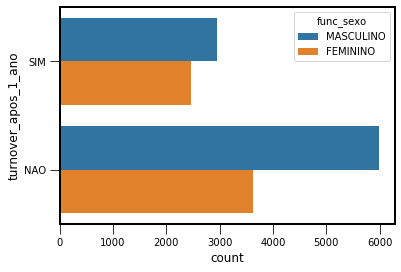

In [7]:
# verificando o efeito do sexo no turnover
sns.countplot(y="turnover_apos_1_ano", hue = 'func_sexo', data=df)

É visível nesse gráfico que uma fração maior das mulheres é desligada em comparação com os homens.

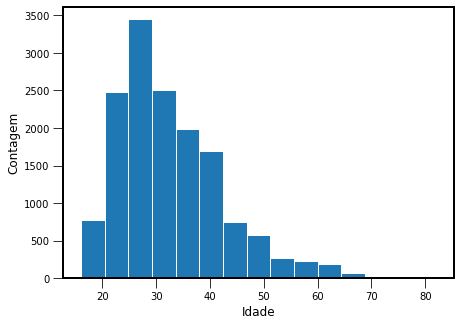

In [8]:
# verificando a distribuição das idades nos dados
fig = plt.figure(figsize=(7,5))

plt.hist(df['func_idade'], edgecolor = 'white', bins = 15)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

A distribuição das idades é assimétrica à direita. 

Nós aplicamos uma transformação logarítmica para obter uma distribuição mais próxima da normal.



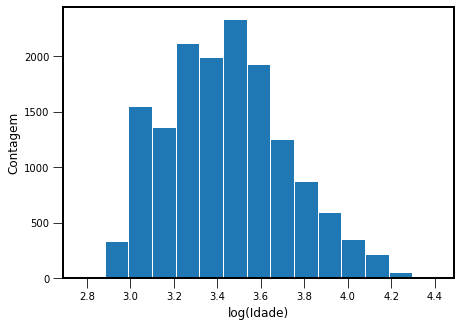

In [9]:
# distribuição das idades após a transformação logarítmica
fig = plt.figure(figsize=(7,5))

plt.hist(df['func_idade'].apply(lambda x: np.log(x)), edgecolor = 'white', bins = 15)
plt.xlabel('log(Idade)')
plt.ylabel('Contagem')
plt.show()

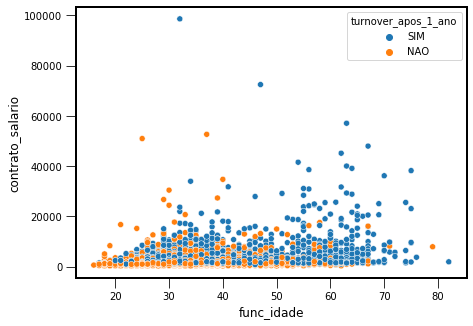

In [10]:
# gráfico de dispersão em função das idades e salários
fig = plt.figure(figsize=(7,5))
sns.scatterplot(x = 'func_idade', y = 'contrato_salario', hue = 'turnover_apos_1_ano', data = df)

Parece haver mais turnover nas idades maiores.

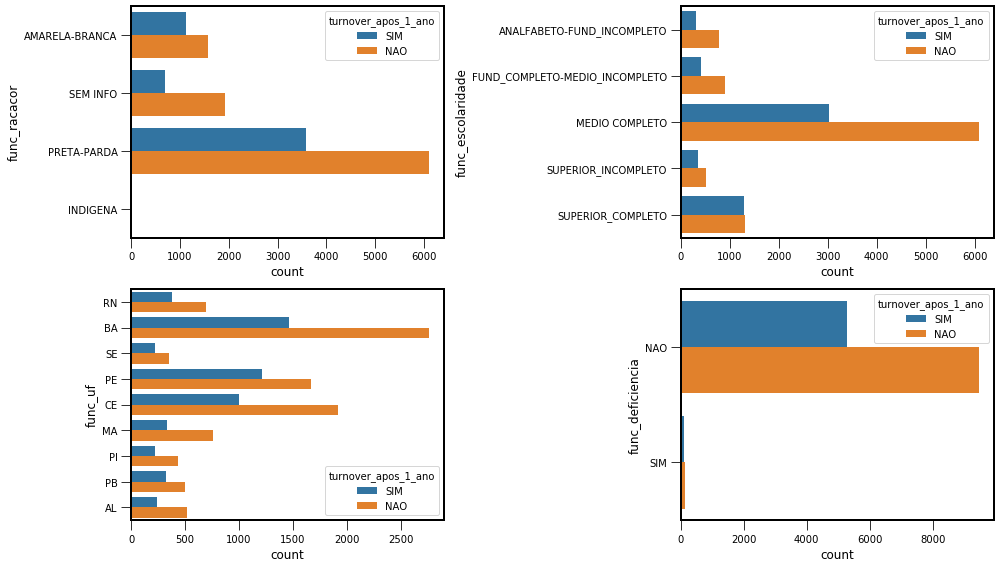

In [11]:
# verificando a distribuição de turnover em relação a: raça/cor, escolaridade, uf e deficiencia
fig = plt.figure(figsize=(14,8))

plt.subplot(2, 2, 1)
sns.countplot(y = "func_racacor", hue = 'turnover_apos_1_ano', data=df)
plt.subplot(2, 2, 2)
sns.countplot(y = "func_escolaridade", hue = 'turnover_apos_1_ano', data=df, order = ['ANALFABETO-FUND_INCOMPLETO', 'FUND_COMPLETO-MEDIO_INCOMPLETO', 'MEDIO COMPLETO', 'SUPERIOR_INCOMPLETO', 'SUPERIOR_COMPLETO'])
plt.subplot(2, 2, 3)
sns.countplot(y = "func_uf", hue = 'turnover_apos_1_ano', data=df)
plt.subplot(2, 2, 4)
sns.countplot(y = "func_deficiencia", hue = 'turnover_apos_1_ano', data=df)
plt.tight_layout()

* Há muitas linhas sem informação da raça/cor


* Quanto maior a escolaridade maior o turnover


* Há alguma diferença entre os estados


* Uma fração muito pequena dos funcionários é portadora de deficiência

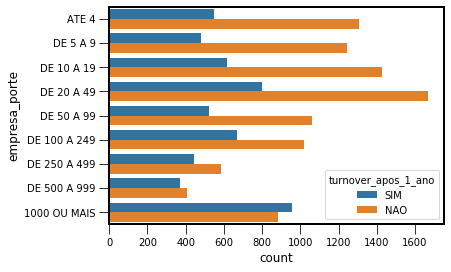

In [12]:
# influência do porte da empresa
sns.countplot(y = "empresa_porte", hue = 'turnover_apos_1_ano', data=df, order = ['ATE 4', 'DE 5 A 9', 'DE 10 A 19', 'DE 20 A 49',
        'DE 50 A 99', 'DE 100 A 249', 'DE 250 A 499', 'DE 500 A 999', '1000 OU MAIS'])

O porte da empresa parece bem decisivo. Empresas maiores tendem a ter proporcionalmente um maior turnover. 

Nós reagrupamos algumas classes de porte das empresas utilizando a função auxiliar abaixo

In [13]:
def aux(x):
  ate_49 = ['ATE 4', 'DE 5 A 9', 'DE 10 A 19', 'DE 20 A 49']
  de_50_a_249 = ['DE 50 A 99', 'DE 100 A 249']
  de_250_a_999 = ['DE 250 A 499', 'DE 500 A 999']
  if x in ate_49:
    return 'ATE 49'
  elif x in de_50_a_249:
    return 'DE 50 A 249'
  elif x in de_250_a_999:
    return 'DE 250 A 999'
  else:
    return '1000 OU MAIS'

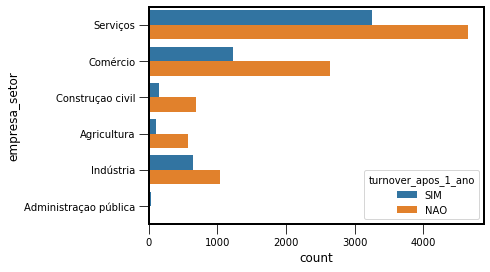

In [14]:
# verificando a influência do setor da empresa no turnover
sns.countplot(y = "empresa_setor", hue = 'turnover_apos_1_ano', data=df)

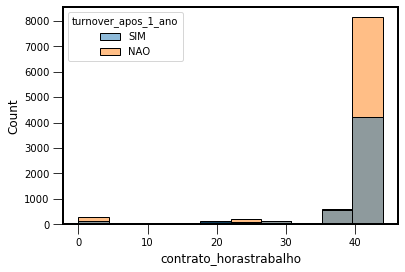

In [15]:
# verifica a distribuição de turnover como função das horas de trabalho
sns.histplot(x = "contrato_horastrabalho", hue = 'turnover_apos_1_ano', data=df, bins = 10)
plt.show()

NameError: name 'bins' is not defined

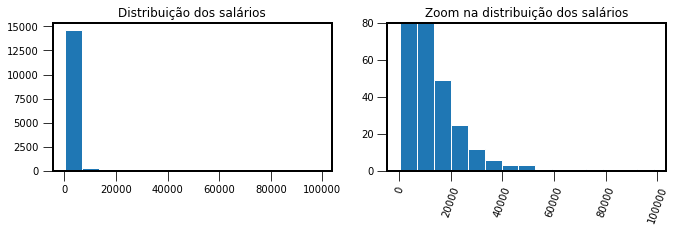

In [16]:
# verificando a distribuição dos salários 
fig = plt.figure(figsize=(11,6))

plt.subplot(2, 2, 1)
plt.hist(df['contrato_salario'], edgecolor = 'white', bins = 15)
plt.title('Distribuição dos salários')
plt.subplot(2, 2, 2)
plt.hist(df['contrato_salario'], edgecolor = 'white', bins = 15)
plt.title('Zoom na distribuição dos salários')
plt.ylim(0, 80)
plt.xticks(rotation = 70)
plt.xticks(bins)
plt.show()

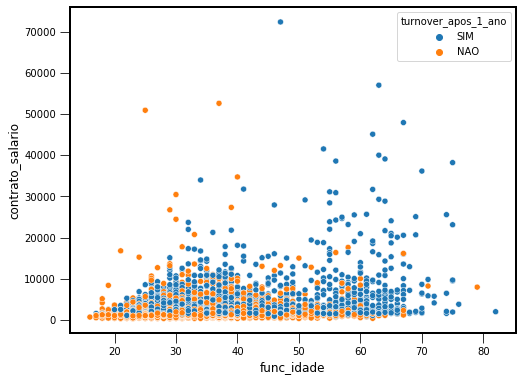

In [17]:
# dispersão dos salários em função da idade
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'func_idade', y = 'contrato_salario', hue = 'turnover_apos_1_ano', data = df[df['contrato_salario'] < 80000])

## Pré-processamento

In [18]:
def pre_process(data_frame):
  """
      Essa função recebe o conjunto de dados, aplica as alterações de pré-processamento e retorna 
      o conjunto de dados modificado
  """

  new_data_frame = data_frame.copy()

  # recategorização dos portes das empresas 
  new_data_frame['empresa_porte'] = new_data_frame['empresa_porte'].apply(aux)

  # removendo as colunas func_racacor, func_deficiencia e func_uf
  new_data_frame.drop(columns = ['func_uf', 'func_deficiencia', 'func_racacor'], axis = 1, inplace = True)

  # dummyficando as variaveis categoricas
  variaveis_cat = ['func_sexo', 'func_escolaridade', 'empresa_porte', 'empresa_setor', 'turnover_apos_1_ano']
  new_data_frame = pd.get_dummies(new_data_frame, columns = variaveis_cat, drop_first = True)

  # normalização das idades
  new_data_frame['func_idade'] = new_data_frame['func_idade'].apply(lambda x: np.log(x))
  idade_media = new_data_frame['func_idade'].mean()
  idade_desvio = new_data_frame['func_idade'].std()
  new_data_frame['func_idade'] = (new_data_frame['func_idade'] - idade_media) / idade_desvio

  # removendo linhas com salários superiores a 80000 
  new_data_frame = new_data_frame.drop(new_data_frame[new_data_frame['contrato_salario'] > 80000].index)

  # mudando as escalas das horas de trabalho e salário
  new_data_frame['contrato_horastrabalho'] = new_data_frame['contrato_horastrabalho'] / new_data_frame['contrato_horastrabalho'].max()
  new_data_frame['contrato_salario'] = new_data_frame['contrato_salario'].apply(lambda x: np.log(x))
  new_data_frame['contrato_salario'] = new_data_frame['contrato_salario'] / new_data_frame['contrato_salario'].max()
    
  return new_data_frame

## Machine Learning

In [19]:
# importando os modelos de classificação que serão testados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

Utilizaremos o método Kfold de validação

In [20]:
# bibliotecas que realizam a validação
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

In [21]:
# testa alguns modelos de classificação e retorna uma tabela com as métricas resultantes
def teste_modelos(var_pred, var_resp):
  lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
  nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

  lista_de_modelos = [DecisionTreeClassifier(),
                          BaggingClassifier(),
                          RandomForestClassifier(),
                          GradientBoostingClassifier()]

  nome_dos_modelos = ['Árvore',
                          'Bagging',
                          'Random Forest',
                          'GradientBoostingClassifier']

  resultados0 = {}

  for i in range(len(lista_de_modelos)):

      print('Rodando modelo: ' + nome_dos_modelos[i])

      accs_vc = cross_validate(lista_de_modelos[i], var_pred, var_resp, cv = validacao, scoring = lista_de_medidas)

      acc = accs_vc['test_accuracy'].mean()
      sen = accs_vc['test_recall'].mean()
      vpp = accs_vc['test_precision'].mean()
      bac = accs_vc['test_balanced_accuracy'].mean()
      f1s = accs_vc['test_f1'].mean()

      resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
      
      
  return pd.DataFrame(resultados0, index = nome_das_medidas).T


In [22]:
# aplicando o pré-processamento nos dados
df_clean = pre_process(df)

In [23]:
# definindo as variáveis preditoras e a variável resposta
X = df_clean.drop('turnover_apos_1_ano_SIM', axis = 1)
y = df_clean['turnover_apos_1_ano_SIM']

In [131]:
resultados = teste_modelos(X, y)
resultados.sort_values(by = 'f1-score', ascending = False)

Rodando modelo: Árvore
Rodando modelo: Bagging
Rodando modelo: Random Forest
Rodando modelo: GradientBoostingClassifier


,acurácia,sensibilidade,precisão,eficiência,f1-score
GradientBoostingClassifier,0.830888,0.874444,0.717880,0.840415,0.788341
Random Forest,0.816655,0.767963,0.734867,0.806004,0.750965
Bagging,0.803954,0.715741,0.733589,0.784660,0.724367
Árvore,0.784719,0.696667,0.703113,0.765460,0.699737


Nesse problema ambos sensibilidade e precisão são importantes. Portanto, iremos avaliar os modelos pelo f1-score. 

O modelo com melhor f1-score foi o GradientBoosting.

Na sequência iremos realizar ajustes dos hiperparâmetros desse modelo.

## Ajuste de hiperparâmetros

In [25]:
from sklearn.model_selection import GridSearchCV

In [28]:
gradboosting = GradientBoostingClassifier()

In [134]:
parametros = { 'n_estimators' : [20, 50, 100, 200], 
                'learning_rate' : [0.01, 0.05, 0.1]}

grid_search = GridSearchCV(gradboosting, param_grid = parametros,
                                   scoring = 'f1', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_jobs = -1)

grid_search.fit(X, y)

Fitting 20 folds for each of 12 candidates, totalling 240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='f1', verbose=1)

In [135]:
# melhor score
grid_search.best_score_

0.7878392813127362

In [136]:
# melhores parâmetros
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [29]:
# testando outros parâmetros
parametros = { 'min_samples_split' : np.arange(2, 10, 2),
                'max_depth' : np.arange(3, 11, 2)}

grid_search = GridSearchCV(gradboosting, param_grid = parametros,
                                   scoring = 'f1', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_jobs = -1)

grid_search.fit(X, y)

Fitting 20 folds for each of 16 candidates, totalling 320 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8])},
             scoring='f1', verbose=1)

In [30]:
# melhor score
grid_search.best_score_

0.7877743446567501

In [31]:
# melhores parâmetros
grid_search.best_params_

{'max_depth': 3, 'min_samples_split': 4}

No ajuste de hiperparâmetros não houve melhora significativa. Iremos utilizar portanto o modelo GradientBoosting padrão.

In [34]:
gradboosting = GradientBoostingClassifier()

In [35]:
gradboosting.fit(X, y)

GradientBoostingClassifier()

## Variáveis de importância

In [42]:
# calcula a importância relativa das variáveis
feature_importances = gradboosting.feature_importances_# = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)

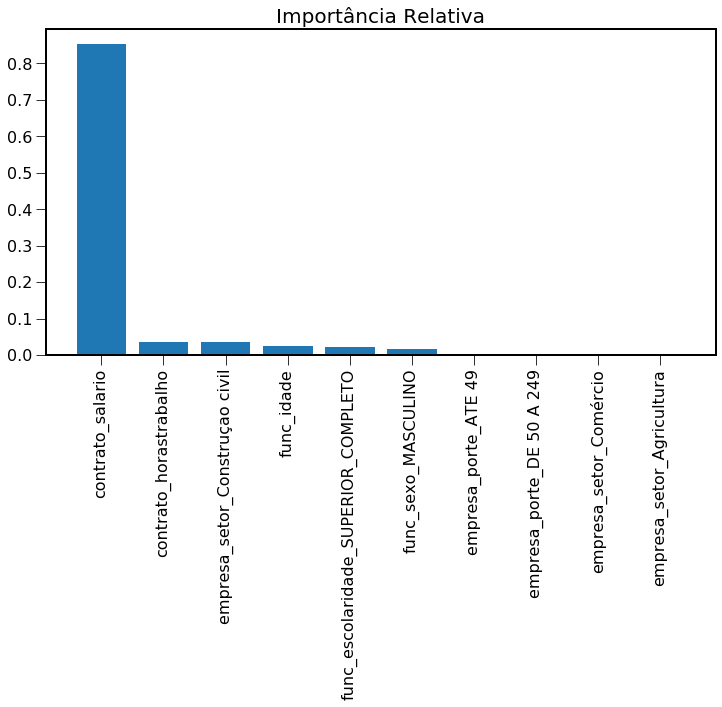

In [45]:
# ordena as variáveis em ordem ascendente de importância
sorted_feat_imp = np.sort(feature_importances)

# guarda a nova ordem dos índices após o reordenamento
arg = feature_importances.argsort()

# retorna o nome das variáveis
feature_names = df_clean.drop('turnover_apos_1_ano_SIM', axis = 1).columns

# reordena os nomes de acordo com o ordenamento de importância
sorted_feat_names = feature_names[arg]

# número de variáveis para serem exibidas no boxplot com as importâncias relativas
num_features = 10

# barplot da importância relativa
fig = plt.figure(figsize = (12, 6))
plt.bar(sorted_feat_names[::-1][:num_features], sorted_feat_imp[::-1][:num_features])
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)
plt.title('Importância Relativa', fontsize = 20)
plt.show()

o salário é de longe a variável de maior importância nessa análise.